<a href="https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs/tutorials/MMClassification_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMClassification tools tutorial on Colab

In this tutorial, we will introduce the following content:

* How to install MMCls
* Prepare data
* Prepare the config file
* Train and test model with shell command

## Install MMClassification

Before using MMClassification, we need to prepare the environment with the following steps:

1. Install Python, CUDA, C/C++ compiler and git
2. Install PyTorch (CUDA version)
3. Install mmcv
4. Clone mmcls source code from GitHub and install it

Because this tutorial is on Google Colab, and the basic environment has been completed, we can skip the first two steps.

### Check environment

In [1]:
%cd /content

/content


In [2]:
!pwd

/content


In [3]:
# Check nvcc version
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0


In [4]:
# Check GCC version
!gcc --version

gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.13.1+cu116
True


### Install MMCV

MMCV is the basic package of all OpenMMLab packages. We have pre-built wheels on Linux, so we can download and install them directly.

Please pay attention to PyTorch and CUDA versions to match the wheel.

In the above steps, we have checked the version of PyTorch and CUDA, and they are 1.9.0 and 11.1 respectively, so we need to choose the corresponding wheel.

In addition, we can also install the full version of mmcv (mmcv-full). It includes full features and various CUDA ops out of the box, but needs a longer time to build.

In [6]:
# Install mmcv
#!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 19.8 MB/s eta 0:00:00


### Clone and install MMClassification

Next, we clone the latest mmcls repository from GitHub and install it.

In [7]:
# Clone mmcls repository
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# Install MMClassification from source
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 12348, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 12348 (delta 10), reused 13 (delta 2), pack-reused 12300
Receiving objects: 100% (12348/12348), 11.39 MiB | 7.46 MiB/s, done.
Resolving deltas: 100% (8550/8550), done.
/content/mmclassification
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmclassification
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmcls


In [8]:
# Check MMClassification installation
import mmcls
print(mmcls.__version__)

0.25.0


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## Prepare data

In [9]:
# Download the dataset (cats & dogs dataset)
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir -p data
!unzip -q cats_dogs_dataset.zip -d ./data/

--2023-02-12 19:05:38--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2023-02-12 19:05:39--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a2e19c0e4d779cccbe721af3c.dl.dropboxusercontent.com/cd/0/inline/B2VYc8y5-4KsrvbBz7_eEacUNwSwr0S6f_-NB66TrMidfwuEnp1hYEzX42lFz3kNYCqfoP7i4cWJ8FS5ThUJn4w2l89Bio2YP8uhGcRTG7VI8_wjYhAV00D5a7PIQLAGx4MZKCOIu9ElQDGkBmeYndRWujSGLlZsklJq-tszkKEZfQ/file# [following]
--2023-02-12 19:05:40--  https://uc7a2e19c0e4d779cccbe721af3c.dl.dropboxusercontent.com/cd/0/inline/B2VYc8y5-4KsrvbBz7_eEacUNwSwr

**After downloading and extraction,** we get "Cats and Dogs Dataset" and the file structure is as below:
```
data/cats_dogs_dataset
├── classes.txt
├── test.txt
├── val.txt
├── training_set
│   ├── training_set
│   │   ├── cats
│   │   │   ├── cat.1.jpg
│   │   │   ├── cat.2.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.2.jpg
│   │   │   ├── dog.3.jpg
│   │   │   ├── ...
├── val_set
│   ├── val_set
│   │   ├── cats
│   │   │   ├── cat.3.jpg
│   │   │   ├── cat.5.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.1.jpg
│   │   │   ├── dog.6.jpg
│   │   │   ├── ...
├── test_set
│   ├── test_set
│   │   ├── cats
│   │   │   ├── cat.4001.jpg
│   │   │   ├── cat.4002.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.4001.jpg
│   │   │   ├── dog.4002.jpg
│   │   │   ├── ...
```

You can use shell command `tree data/cats_dogs_dataset` to check the structure.

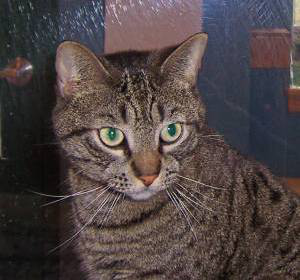

In [10]:
# Pick an image and visualize it
from PIL import Image
Image.open('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

### Support new dataset

We have two methods to support a new dataset in MMClassification.

The simplest method is to re-organize the new dataset as the format of a dataset supported officially (like ImageNet). And the other method is to create a new dataset class, and more details are in [the docs](https://mmclassification.readthedocs.io/en/latest/tutorials/new_dataset.html#an-example-of-customized-dataset).

In this tutorial, for convenience, we have re-organized the cats & dogs dataset as the format of ImageNet.

Besides image files, it also includes the following files:

1. A class list file, and every line is a class.
    ```
    cats
    dogs
    ```
2. Training / Validation / Test annotation files. And every line includes an file path and the corresponding label.

    ```
    ...
    cats/cat.3769.jpg 0
    cats/cat.882.jpg 0
    ...
    dogs/dog.3881.jpg 1
    dogs/dog.3377.jpg 1
    ...
    ```

## Train and test model with shell commands

You can use shell commands provided by MMClassification to do the following task:

1. Train a model
2. Fine-tune a model
3. Test a model
4. Inference with a model

The procedure to train and fine-tune a model is almost the same. And we have introduced how to do these tasks with Python API. In the following, we will introduce how to do them with shell commands. More details are in [the docs](https://mmclassification.readthedocs.io/en/latest/getting_started.html).

### Fine-tune a model

The steps to fine-tune a model are as below:

1. Prepare the custom dataset.
2. Create a new config file of the task.
3. Start training task by shell commands.

We have finished the first step, and then we will introduce the next two steps.


#### Create a new config file

To reuse the common parts of different config files, we support inheriting multiple base config files. For example, to fine-tune a MobileNetV2 model, the new config file can create the model's basic structure by inheriting `configs/_base_/models/mobilenet_v2_1x.py`.

According to the common practice, we usually split whole configs into four parts: model, dataset, learning rate schedule, and runtime. Configs of each part are saved into one file in the `configs/_base_` folder. 

And then, when creating a new config file, we can select some parts to inherit and only override some different configs.

The head of the final config file should look like:

```python
_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]
```

Here, because the dataset configs are almost brand new, we don't need to inherit any dataset config file.

Of course, you can also create an entire config file without inheritance, like `configs/mnist/lenet5.py`.

After that, we only need to set the part of configs we want to modify, because the inherited configs will be merged to the final configs.

In [11]:
%%writefile configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py
_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]

# ---- Model configs ----
# Here we use init_cfg to load pre-trained model.
# In this way, only the weights of backbone will be loaded.
# And modify the num_classes to match our dataset.

model = dict(
    backbone=dict(
        init_cfg = dict(
            type='Pretrained', 
            checkpoint='https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 
            prefix='backbone')
    ),
    head=dict(
        num_classes=2,
        topk = (1, )
    ))

# ---- Dataset configs ----
# We re-organized the dataset as ImageNet format.
dataset_type = 'ImageNet'
img_norm_cfg = dict(
     mean=[124.508, 116.050, 106.438],
     std=[58.577, 57.310, 57.437],
     to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', size=224, backend='pillow'),
    dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='ToTensor', keys=['gt_label']),
    dict(type='Collect', keys=['img', 'gt_label'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', size=(256, -1), backend='pillow'),
    dict(type='CenterCrop', crop_size=224),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='Collect', keys=['img'])
]
data = dict(
    # Specify the batch size and number of workers in each GPU.
    # Please configure it according to your hardware.
    samples_per_gpu=32,
    workers_per_gpu=2,
    # Specify the training dataset type and path
    train=dict(
        type=dataset_type,
        data_prefix='data/cats_dogs_dataset/training_set/training_set',
        classes='data/cats_dogs_dataset/classes.txt',
        pipeline=train_pipeline),
    # Specify the validation dataset type and path
    val=dict(
        type=dataset_type,
        data_prefix='data/cats_dogs_dataset/val_set/val_set',
        ann_file='data/cats_dogs_dataset/val.txt',
        classes='data/cats_dogs_dataset/classes.txt',
        pipeline=test_pipeline),
    # Specify the test dataset type and path
    test=dict(
        type=dataset_type,
        data_prefix='data/cats_dogs_dataset/test_set/test_set',
        ann_file='data/cats_dogs_dataset/test.txt',
        classes='data/cats_dogs_dataset/classes.txt',
        pipeline=test_pipeline))

# Specify evaluation metric
evaluation = dict(metric='accuracy', metric_options={'topk': (1, )})

# ---- Schedule configs ----
# Usually in fine-tuning, we need a smaller learning rate and less training epochs.
# Specify the learning rate
optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001)
optimizer_config = dict(grad_clip=None)
# Set the learning rate scheduler
lr_config = dict(policy='step', step=1, gamma=0.1)
runner = dict(type='EpochBasedRunner', max_epochs=2)

# ---- Runtime configs ----
# Output training log every 10 iterations.
log_config = dict(interval=10)

Writing configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py


#### Use shell command to start fine-tuning

We use `tools/train.py` to fine-tune a model:

```shell
python tools/train.py ${CONFIG_FILE} [optional arguments]
```

And if you want to specify another folder to save log files and checkpoints, use the argument `--work_dir ${YOUR_WORK_DIR}`.

If you want to ensure reproducibility, use the argument `--seed ${SEED}` to set a random seed. And the argument `--deterministic` can enable the deterministic option in cuDNN to further ensure reproducibility, but it may reduce the training speed.

Here we use the `MobileNetV2` model and cats & dogs dataset as an example:


In [12]:
!python tools/train.py \
  configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py \
  --work-dir work_dirs/mobilenet_v2_1x_cats_dogs \
  --seed 0 \
  --deterministic

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/content/mmclassification/mmcls/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/content/mmclassification/mmcls/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warni

### Test a model

We use `tools/test.py` to test a model:

```
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [optional arguments]
```

Here are some optional arguments:

- `--metrics`: The evaluation metrics. The available choices are defined in the dataset class. Usually, you can specify "accuracy" to metric a single-label classification task.
- `--metric-options`: The extra options passed to metrics. For example, by specifying "topk=1", the "accuracy" metric will calculate top-1 accuracy.

More details are in the help docs of `tools/test.py`.

Here we still use the `MobileNetV2` model we fine-tuned.

In [13]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --metrics accuracy --metric-options topk=1

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/content/mmclassification/mmcls/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/content/mmclassification/mmcls/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warni

### Inference with a model

Sometimes we want to save the inference results on a dataset, just use the command below.

```shell
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--out ${RESULT_FILE}]
```

Arguments：

- `--out`: The output filename. If not specified, the inference results won't be saved. It supports json, pkl and yml.
- `--out-items`: What items will be saved. You can choose some of "class_scores", "pred_score", "pred_label" and "pred_class", or use "all" to select all of them.

These items mean:
- `class_scores`: The score of every class for each sample.
- `pred_score`: The score of predict class for each sample.
- `pred_label`: The label of predict class for each sample. It will read the label string of each class from the model, if the label strings are not saved, it will use ImageNet labels.
- `pred_class`: The id of predict class for each sample. It's a group of integers. 
- `all`: Save all items above.
- `none`: Don't save any items above. Because the output file will save the metric besides inference results. If you want to save only metrics, you can use this option to reduce the output file size.


In [14]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --out results.json --out-items all

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/content/mmclassification/mmcls/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/content/mmclassification/mmcls/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warni

All inference results are saved in the output json file, and you can read it.

class_scores: [0.7131637930870056, 0.286836177110672]
pred_class: cats
pred_label: 0
pred_score: 0.7131637930870056


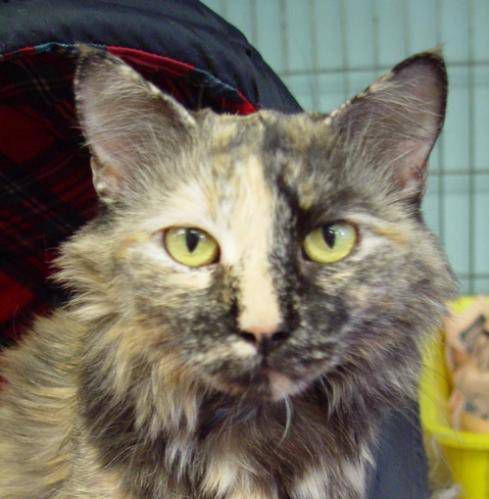

In [18]:
import json

with open("./results.json", 'r') as f:
    results = json.load(f)

# Show the inference result of the first image.
print('class_scores:', results['class_scores'][1])
print('pred_class:', results['pred_class'][1])
print('pred_label:', results['pred_label'][1])
print('pred_score:', results['pred_score'][1])
Image.open('data/cats_dogs_dataset/training_set/training_set/cats/cat.10.jpg')

You can also use the visualization API provided by MMClassification to show the inference result.

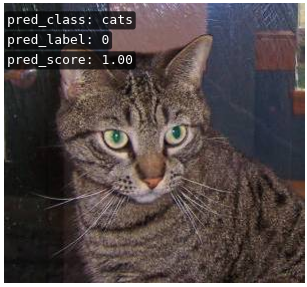

In [16]:
from mmcls.core.visualization import imshow_infos

filepath = 'data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg'

result = {
    'pred_class': results['pred_class'][0],
    'pred_label': results['pred_label'][0],
    'pred_score': results['pred_score'][0],
}

img = imshow_infos(filepath, result)